# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [2]:
import numpy as np
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns', None)

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [3]:
employee = pd.read_csv('Employee.csv')

In [4]:
employee.columns=[e.lower().replace(' ', '_') for e in employee.columns]

employee.head()

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [15]:
#Opción 1.
pivot_table = pd.pivot_table(employee, index=['department'], values=['salary'], aggfunc='mean')

pivot_table

,salary
department,
HR,45.00
IT,48.75
Sales,55.00


In [6]:
#Opción 2.

# Calcular el salario promedio por departamento
mean_salary_by_department = employee.groupby('department')['salary'].mean()

mean_salary_by_department

department
HR       45.00
IT       48.75
Sales    55.00
Name: salary, dtype: float64

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [16]:
pivot_table = pd.pivot_table(employee, index=['department', 'title'], values=['salary'], aggfunc='mean')

pivot_table

salary
department title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [13]:
pivot_table = pd.pivot_table(employee, index=['title'], values=['years', 'salary'])
pivot_table

,salary,years
title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [23]:
pivot_table = pd.pivot_table(employee, index=['department', 'title'], values=['salary'], aggfunc={'salary': 'mean', 'title': 'count'})

pivot_table

salary  title
department title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [17]:
pivot_table = pd.pivot_table(
    employee,
    index=['department', 'title'],
    values=['salary'],
    aggfunc={'salary': ['median', 'min', 'max', 'std']}
    )

pivot_table

salary                     
                        max median min       std
department title                                
HR         VP            70   70.0  70       NaN
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70       NaN
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60       NaN
Sales      associate     55   55.0  55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [21]:
pivot_table = pd.pivot_table(
    employee,
    index=['department', 'title'],
    values=['salary'],
    aggfunc={'salary': ['median', 'min', 'max', 'std']},
    fill_value=0)

pivot_table

salary                     
                        max median min       std
department title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [26]:
department_summary = employee.groupby('department').agg({'name': 'count', 'salary': 'sum'})

department_summary

,name,salary
department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [27]:
department_title_summary = employee.groupby(['department', 'title']).agg({'years': 'sum', 'salary': 'mean'})

department_title_summary

years  salary
department title                   
HR         VP             8    70.0
           analyst        6    32.5
IT         VP             8    70.0
           analyst        3    32.5
           associate      7    60.0
Sales      associate      5    55.0

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [ ]:
# your answer here

In [ ]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [33]:
fitbit = pd.read_csv('Fitbit.csv')

In [34]:
fitbit.columns = [e.lower().replace(' ', '_') for e in fitbit.columns]

fitbit.head()

,date,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,minutesofsleep,minutesofbeingawake,numberofawakings,lengthofrestinminutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [35]:
fitbit_types = fitbit.dtypes

fitbit_types


date                       object
calorie_burned              int64
steps                       int64
distance                  float64
floors                      int64
minutes_sedentary         float64
minutes_lightly_active      int64
minutes_fairly_active       int64
minutes_very_active         int64
activity_calories           int64
minutesofsleep              int64
minutesofbeingawake         int64
numberofawakings            int64
lengthofrestinminutes       int64
dtype: object

In [37]:
fitbit_stats = fitbit.describe().T

fitbit_stats

,count,mean,std,min,25%,50%,75%,max
calorie_burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
minutes_sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
minutes_lightly_active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
minutes_fairly_active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
minutes_very_active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
activity_calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
minutesofsleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [49]:
correlation_minutes_active_steps = fitbit['minutes_very_active'].corr(fitbit['steps'])

correlation_minutes_active_steps

0.5714518481062606

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [40]:
import matplotlib.pyplot as plt

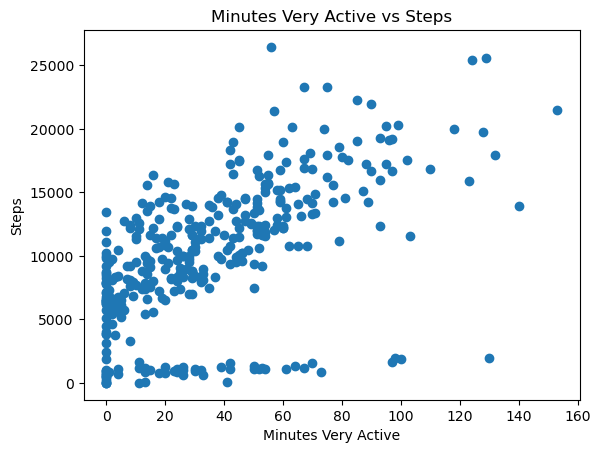

In [48]:
plt.scatter(fitbit['minutes_very_active'], fitbit['steps'])
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.title("Minutes Very Active vs Steps")
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

Que existe una relación lineal y postiva entre ambas variables, aunque no muy fuerte.

Los puntos en el gráfico están dispersos y sin un patrón claro. Es decir, la cantidad de minutos muy activos no está fuertemente correlacionada con la cantidad de pasos dados.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [51]:
correlation_minutes_sedentary_steps = fitbit['minutes_sedentary'].corr(fitbit['steps'])

correlation_minutes_sedentary_steps

0.07690608062990097

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

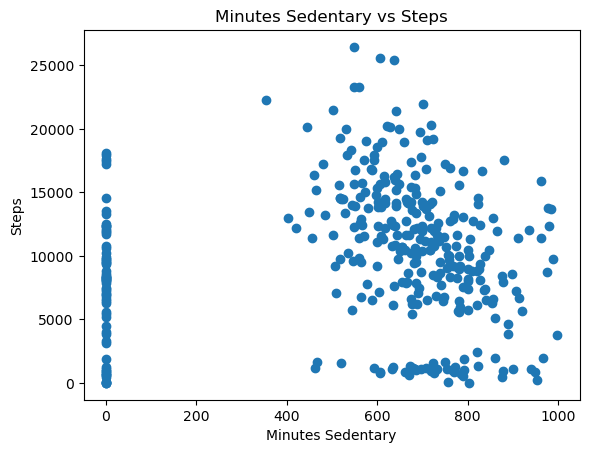

In [52]:
plt.scatter(fitbit['minutes_sedentary'], fitbit['steps'])

plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.title("Minutes Sedentary vs Steps")

plt.show()

Puede concluirse que no existe una fuerte correlación lineal entre "Minutos Sedentarios" y "Pasos".

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [54]:
correlation_minutes_sleep_steps = fitbit['minutesofsleep'].corr(fitbit['steps'])

correlation_minutes_sleep_steps

0.13098565950836388

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

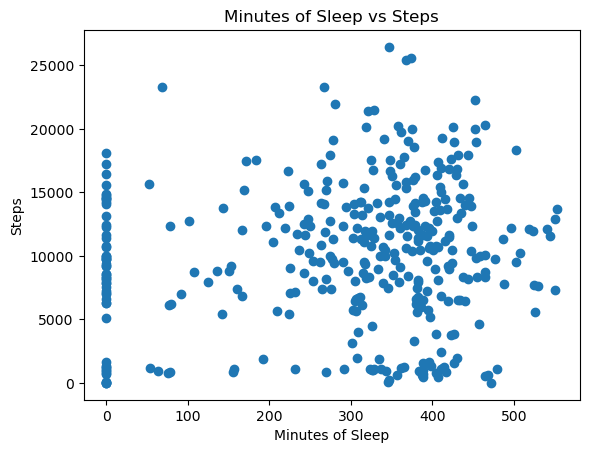

In [55]:
plt.scatter(fitbit['minutesofsleep'], fitbit['steps'])

plt.xlabel("Minutes of Sleep")
plt.ylabel("Steps")
plt.title("Minutes of Sleep vs Steps")

plt.show()

No existe una fuerte correlación lineal entre estas dos variables. Los puntos en el gráfico están dispersos sin un patrón defnido, y el coeficiente de correlación es cercano a 0.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [56]:
cols = ['calorie_burned', 'steps', 'floors', 'minutes_sedentary', 'minutes_very_active', 'minutesofsleep']

subset = fitbit[cols]

In [58]:
cor_fit = subset.corr()
cor_fit

,calorie_burned,steps,floors,minutes_sedentary,minutes_very_active,minutesofsleep
calorie_burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
minutes_sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
minutes_very_active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
minutesofsleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [60]:
correlation_steps = cor_fit['steps'].sort_values(ascending=False)

correlation_steps

steps                  1.000000
minutes_very_active    0.571452
floors                 0.306511
calorie_burned         0.255305
minutesofsleep         0.130986
minutes_sedentary      0.076906
Name: steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [61]:
time_grades = pd.read_csv('Time_Grades.csv')

In [62]:
time_grades.columns = [e.lower().replace(' ', '_') for e in time_grades.columns]

time_grades.head()

,name,study_time,grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

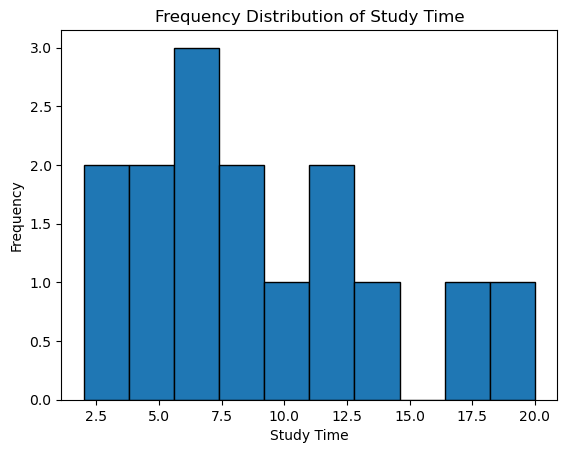

In [66]:
plt.hist(time_grades['study_time'], bins=10, edgecolor='k')

plt.xlabel("Study Time")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Study Time")

plt.show()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [68]:
pearson_correlation = time_grades['study_time'].corr(time_grades['grade'], method='pearson')

pearson_correlation

0.7980456073578858

In [69]:
spearman_correlation = time_grades['study_time'].corr(time_grades['grade'], method='spearman')

spearman_correlation

0.819658753036942

Sí, tanto la correlación de Pearson como la correlación de Spearman muestran una relación positiva entre el tiempo de estudio y las calificaciones. 

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

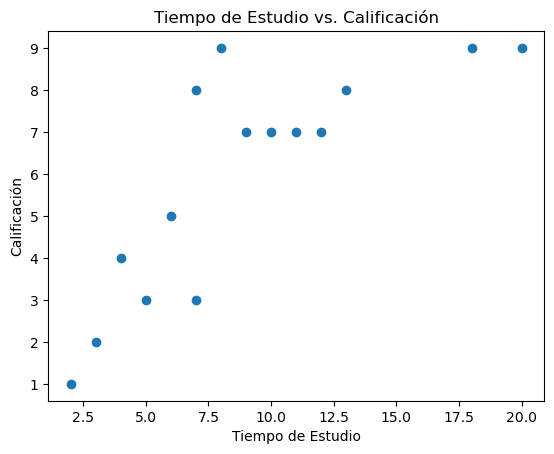

In [70]:
plt.scatter(time_grades['study_time'], time_grades['grade'])

plt.xlabel("Tiempo de Estudio")
plt.ylabel("Calificación")
plt.title("Tiempo de Estudio vs. Calificación")

plt.show()

Tanto los coeficientes de correlación como el gráfico de dispersión indican una relación lineal positiva entre "Tiempo de Estudio" y "Calificación". Esto significa que a medida que aumenta el tiempo de estudio, la calificación tiende a aumentar.
Cuanto más tiempo dedican los estudiantes al estudio, tienden a obtener calificaciones más altas. 

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

El coeficiente de correlación de Pearson es una medida de la relación lineal entre dos variables continuas.
Supone que las variables siguen una distribución normal y que la relación entre ellas es lineal. Es sensible a relaciones lineales.
Varía de -1 a 1, donde 1 indica una relación lineal positiva perfecta, -1 indica una relación lineal negativa perfecta y 0 indica la ausencia de una relación lineal.
La correlación de Pearson se calcula en función de la covarianza de las variables y el producto de sus desviaciones estándar. Se define como la proporción de la covarianza al producto de las desviaciones estándar.

El coeficiente de correlación de Spearman no supone que las variables sigan una distribución específica y no se limita a relaciones lineales. 
Se basa en los rangos de los datos en lugar de en los valores reales de los datos. Calcula la correlación en función de los valores clasificados de las variables.
La correlación de Spearman varía de -1 a 1, con la misma interpretación que la correlación de Pearson.

Es decir, la correlación de Pearson se utiliza para evaluar relaciones lineales en datos que siguen una distribución normal, mientras que la correlación de Spearman se utiliza para evaluar relaciones no necesariamente lineales en datos que pueden no seguir una distribución normal. La correlación de Spearman se utiliza a menudo cuando los datos son ordinales o cuando no se cumplen las suposiciones para la correlación de Pearson.